In [20]:
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary

In [21]:
trainingDataSet = datasets.MNIST('', train=True, download=True, transform=ToTensor())
testingDataSet = datasets.MNIST('', train=False, download=True, transform=ToTensor())
trainDataLoader = torch.utils.data.DataLoader(trainingDataSet, batch_size=50, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testingDataSet, batch_size=50, shuffle=True)

In [33]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

class Model2(nn.Module): 
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, val):
        val = val.view(-1, 28 * 28)
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val


In [23]:
mdl1 = Model1()
summary(mdl1,(28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
            Linear-2                   [-1, 10]           2,570
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.78
Estimated Total Size (MB): 0.78
----------------------------------------------------------------


In [24]:
mdl2 = Model2()
summary(mdl2,(28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          15,700
            Linear-2                   [-1, 30]             630
            Linear-3                   [-1, 10]             310
Total params: 16,640
Trainable params: 16,640
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


In [34]:
mdl3 = Model3()
summary(mdl3,(28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
            Linear-2                  [-1, 128]          32,896
            Linear-3                   [-1, 64]           8,256
            Linear-4                   [-1, 10]             650
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.93
Estimated Total Size (MB): 0.93
----------------------------------------------------------------


In [26]:
lossFunc = nn.CrossEntropyLoss()
model1inOpt = optim.Adam(mdl1.parameters(), lr=0.001)
model2inOpt = optim.Adam(mdl2.parameters(), lr=0.001)
model3inOpt = optim.Adam(mdl3.parameters(),lr=0.001)

In [36]:
def calcParams(inputModel):
    val = sum(params.numel() for params in inputModel.parameters() if params.requires_grad)
    return val
print(calcParams(mdl1))
print(calcParams(mdl2))
print(calcParams(mdl3))

203530
16640
242762


In [28]:
EPOCHS = 20
model1Cost = []
model1TrainingAccuracy = []
model1TestAccuracy = []
for index in range(EPOCHS):
    print(index)
    for batch in trainDataLoader:
        inputImages, actual = batch
        mdl1.zero_grad()
        output = mdl1(inputImages.view(-1,784))
        cost = lossFunc(output, actual)
        cost.backward()
        model1inOpt.step()
    model1Cost.append(cost.detach().numpy())
    print(f'epoch - {index+1} : loss - {cost.item(): .3f}')
    
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in trainDataLoader:
            inputImages, actual = batch
            output = mdl1(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == actual[i]:
                    correct += 1
                total += 1
    model1TrainingAccuracy.append(round(correct/total, 3))

    correct = 0
    total = 0
    with torch.no_grad():
        for batch in testDataLoader:
            inputImages, actual = batch
            output = mdl1(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == actual[i]:
                    correct += 1
                total += 1
    model1TestAccuracy.append(round(correct/total, 3))

0
epoch - 1 : loss -  0.166
1
epoch - 2 : loss -  0.096
2
epoch - 3 : loss -  0.023
3
epoch - 4 : loss -  0.086
4
epoch - 5 : loss -  0.027
5
epoch - 6 : loss -  0.024
6
epoch - 7 : loss -  0.003
7
epoch - 8 : loss -  0.014
8
epoch - 9 : loss -  0.006
9
epoch - 10 : loss -  0.034
10
epoch - 11 : loss -  0.007
11
epoch - 12 : loss -  0.014
12
epoch - 13 : loss -  0.002
13
epoch - 14 : loss -  0.006
14
epoch - 15 : loss -  0.005
15
epoch - 16 : loss -  0.002
16
epoch - 17 : loss -  0.000
17
epoch - 18 : loss -  0.003
18
epoch - 19 : loss -  0.036
19
epoch - 20 : loss -  0.001


In [29]:
# Train Deep neural networks, Calculate accuracy for training and testing in each epoch
model2Cost = []
model2TrainingAccuracy = []
model2TestAccuracy = []
for index in range(EPOCHS):
    print(index)
    # Train model and keep track of loss
    for batch in trainDataLoader:
        inputImages, actual = batch
        mdl2.zero_grad()
        output = mdl2(inputImages.view(-1,784))
        cost = lossFunc(output, actual)
        cost.backward()
        model2inOpt.step()
    model2Cost.append(cost.detach().numpy())
    print(f'epoch - {index+1} : loss - {cost.item(): .3f}')
    # Calculate accuracy of deep nn on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in trainDataLoader:
            inputImages, actual = batch
            output = mdl2(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == actual[i]:
                    correct += 1
                total += 1
    model2TrainingAccuracy.append(round(correct/total, 3))

    # Calculate accuracy of deep nn on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in testDataLoader:
            inputImages, actual = batch
            output = mdl2(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == actual[i]:
                    correct += 1
                total += 1
    model2TestAccuracy.append(round(correct/total, 3)) 

0
epoch - 1 : loss -  0.409
1
epoch - 2 : loss -  0.191
2
epoch - 3 : loss -  0.110
3
epoch - 4 : loss -  0.169
4
epoch - 5 : loss -  0.091
5
epoch - 6 : loss -  0.018
6
epoch - 7 : loss -  0.032
7
epoch - 8 : loss -  0.044
8
epoch - 9 : loss -  0.159
9
epoch - 10 : loss -  0.037
10
epoch - 11 : loss -  0.048
11
epoch - 12 : loss -  0.129
12
epoch - 13 : loss -  0.029
13
epoch - 14 : loss -  0.132
14
epoch - 15 : loss -  0.173
15
epoch - 16 : loss -  0.161
16
epoch - 17 : loss -  0.189
17
epoch - 18 : loss -  0.035
18
epoch - 19 : loss -  0.095
19
epoch - 20 : loss -  0.125


In [35]:
# Train Deep neural networks, Calculate accuracy for training and testing in each epoch
model3Cost = []
model3TrainingAccuracy = []
model3TestAccuracy = []
for index in range(EPOCHS):
    print(index)
    # Train model and keep track of loss
    for batch in trainDataLoader:
        inputImages, actual = batch
        mdl3.zero_grad()
        output = mdl3(inputImages)
        cost = lossFunc(output, actual)
        cost.backward()
        model3inOpt.step()
    model3Cost.append(cost.detach().numpy())
    print(f'epoch - {index+1} : loss - {cost.item(): .3f}')
    
    # Calculate accuracy of deep nn on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in trainDataLoader:
            inputImages, actual = batch
            output = mdl3(inputImages)
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == actual[i]:
                    correct += 1
                total += 1
    model3TrainingAccuracy.append(round(correct/total, 3))

    # Calculate accuracy of deep nn on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in testDataLoader:
            inputImages, actual = batch
            output = mdl3(inputImages)
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == actual[i]:
                    correct += 1
                total += 1
    model3TestAccuracy.append(round(correct/total, 3)) 

0
epoch - 1 : loss -  2.298
1
epoch - 2 : loss -  2.300
2
epoch - 3 : loss -  2.302
3
epoch - 4 : loss -  2.305
4
epoch - 5 : loss -  2.310
5
epoch - 6 : loss -  2.291
6
epoch - 7 : loss -  2.309
7
epoch - 8 : loss -  2.304
8
epoch - 9 : loss -  2.299
9
epoch - 10 : loss -  2.308
10
epoch - 11 : loss -  2.300
11
epoch - 12 : loss -  2.301
12
epoch - 13 : loss -  2.296
13
epoch - 14 : loss -  2.306
14
epoch - 15 : loss -  2.303
15
epoch - 16 : loss -  2.304
16
epoch - 17 : loss -  2.299
17
epoch - 18 : loss -  2.301
18
epoch - 19 : loss -  2.301
19
epoch - 20 : loss -  2.301


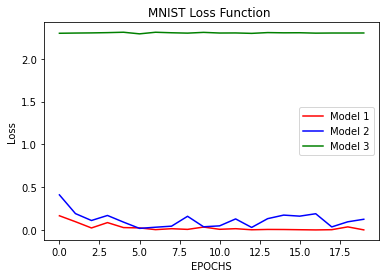

In [37]:
# Visulaize Training process of nn for MNIST dataset
plt.plot(range(EPOCHS), model1Cost, 'r', label='Model 1')
plt.plot(range(EPOCHS), model2Cost, 'b', label='Model 2')
plt.plot(range(EPOCHS), model3Cost,'g',label = 'Model 3')
plt.title("MNIST Loss Function ")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.show()

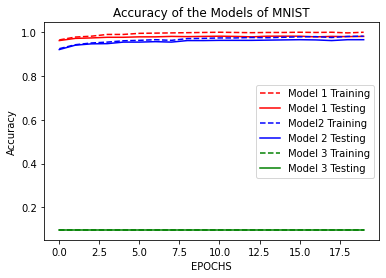

In [38]:
# Visulaize Accuracy of nn for for MNIST dataset
plt.plot(range(EPOCHS), model1TrainingAccuracy, 'r--', label='Model 1 Training')
plt.plot(range(EPOCHS), model1TestAccuracy, 'r', label='Model 1 Testing')
plt.plot(range(EPOCHS), model2TrainingAccuracy, 'b--', label='Model2 Training')
plt.plot(range(EPOCHS), model2TestAccuracy, 'b', label='Model 2 Testing')
plt.plot(range(EPOCHS), model3TrainingAccuracy, 'g--', label='Model 3 Training')
plt.plot(range(EPOCHS), model3TestAccuracy, 'g', label='Model 3 Testing')
plt.title("Accuracy of the Models of MNIST")
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend()
plt.show()